# Capstone Project - H&M Recommendation

Ana Berta Vegas; Ester Iglesias; Raquel Dominguez

## Transactions

En aquest notebook estudiarem el dataset "transactions".

En primer lloc, importem les llibreries necessàries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

Llegim les dades a tractar i observem quina informació contenen:

In [2]:
df_transactions = pd.read_csv('transactions_train.csv')

In [3]:
df_transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


Observem que el dataset Transactions té un total de 31788324 observacions, i el número total de variables és 5. És a dir, cada una de les transaccions està caracteritzada per:
- **customer_id**: Identificador del consumidor
- **article_id**: Identificador de l'article de H&M (Samarreta X, Pantalons X, ...)
- **t_dat**: Data de la compra
- **price**: Preu del producte
- **sales_channel_id**: Canal mitjançant el qual s'ha comprat l'article (Físicament 1 o Online 2)

Les variables anteriors, les classifiquem segons siguin numèriques o categòriques:
- **Numèriques**: price
- **Categòriques**: t_dat, customer_id, article_id, sales_channel_id

Observem que hi ha certs tipos de variables que cal ajustar per tal que la classificació anterior sigui coherent. En primer lloc, la columna de timestamp ha de ser de tipus datatime:

In [5]:
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

Les altres variables que cal reajustar són la resta de variables categòriques, ja que s'han interpretat com a numèriques. Fem-ho:

In [6]:
df_transactions["customer_id"] = df_transactions["customer_id"].astype("category")

In [7]:
df_transactions["article_id"] = df_transactions["article_id"].astype("category")

In [8]:
df_transactions["sales_channel_id"] = df_transactions["sales_channel_id"].astype("category")

Netejem el dataset i borrem les files repetides, ja que no aporten cap valor afegit a l'anàlisi:

In [9]:
df_transactions.drop_duplicates(inplace=True, ignore_index=True)

In [10]:
df_transactions.shape

(28813419, 5)

Observem que s'han borrat un total de X files. En resum, doncs, la situació actual és la següent:

In [11]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28813419 entries, 0 to 28813418
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       category      
 2   article_id        category      
 3   price             float64       
 4   sales_channel_id  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 734.4 MB


Veiem ara una primera descripció de les variables. 

Pel que fa a les variables numèriques, en aquest cas el preu:

In [12]:
df_transactions.describe(include=[np.number])

,price
count,2.881342e+07
mean,2.772868e-02
std,1.910103e-02
min,1.694915e-05
25%,1.567797e-02
50%,2.540678e-02
75%,3.388136e-02
max,5.915254e-01


<AxesSubplot:>

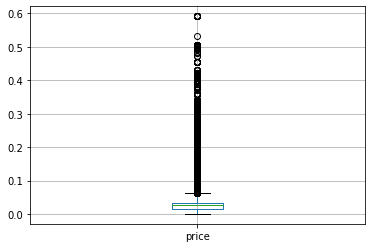

In [13]:
df_transactions.boxplot()

Podem veure que la variable preu, no és un preu estandard que es troba quan compres una samareta al H&M per exemple. Sino que és un valor que es mou majoritariament entre 0.00001 i 0.03. També podem trobar alguns outliers entre 0.05 i 0.6. Per tant, aquests valors de preus no son els originals, sino que s'ha aplicat alguna regla per transforma-los i codificar-los per motius de privacitat. 

Per altra banda, en quant a les variables categòriques:

In [14]:
df_transactions.describe(include='category')

,customer_id,article_id,sales_channel_id
count,28813419,28813419,28813419
unique,1362281,104547,2
top,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,706016001,2
freq,1641,42672,19686806


Per últim, analitzem les dates:

In [15]:
df_transactions["t_dat"].describe()

/shared/apps/dtpjpt/anaconda3/envs/jupyterhubenv_base/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                28813419
unique                    734
top       2019-09-28 00:00:00
freq                   176904
first     2018-09-20 00:00:00
last      2020-09-22 00:00:00
Name: t_dat, dtype: object

En resum, tenim que:

In [16]:
df_transactions.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

És a dir, d'un total de 28813419 compres, les han realitzat un total de 1362281, comprant 104547 articles diferents, ja sigui de manera online o física. Pel que fa a les dates, només hi ha hagut adquisicions en 734 dies diferents.

A continuació fem un estudi per cada una de les variables. En primer lloc, mirem si hi ha alguna fila amb algun valor buit:

In [17]:
df_transactions.isnull().values.any()

False

No hi ha cap dada nula, tenim el dataset complet.

Estudiem, doncs, cada variable:

**t_dat**

En primer lloc, mirem quina quantitat de transaccions s'han realitzat cada dia:

In [18]:
df_t_dat = pd.DataFrame()
df_t_dat['transactions'] = df_transactions["t_dat"].value_counts()
df_t_dat.reset_index(level=0, inplace=True)
df_t_dat.rename(columns={"index": "t_dat"}, inplace=True)
df_t_dat = df_t_dat.sort_values("t_dat", ascending = True, ignore_index = True)
df_t_dat

,t_dat,transactions
0,2018-09-20,43719
1,2018-09-21,43010
2,2018-09-22,16276
3,2018-09-23,46633
4,2018-09-24,41373
...,...,...
729,2020-09-18,35790
730,2020-09-19,33856
731,2020-09-20,28144
732,2020-09-21,28928


Observem que el rang de dates es mou des del 20/09/2018 fins al 22/09/2020, és a dir tenim dades d'aproximadament 2 anys.

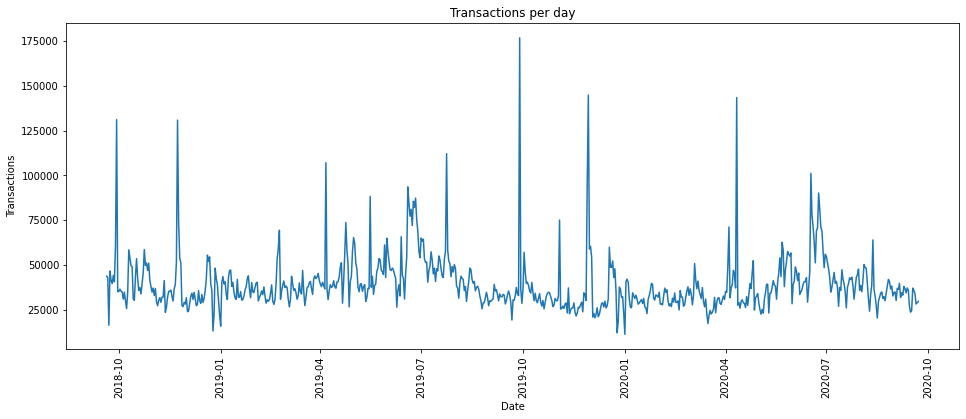

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df_t_dat["t_dat"], df_t_dat["transactions"])
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day")
plt.show()

Mirem quins són els dies que s'han fet menys transaccions:

In [20]:
df_t_dat = df_t_dat.sort_values("transactions", ignore_index = True)
df_t_dat.head(10)

,t_dat,transactions
0,2020-01-01,11194
1,2019-12-25,12055
2,2018-12-25,13061
3,2019-01-01,15792
4,2018-09-22,16276
5,2020-03-16,17242
6,2019-12-26,18364
7,2019-09-21,19186
8,2020-08-16,20314
9,2019-12-05,20443


Per altra banda, els dies que s'han fet més compres:

In [21]:
df_t_dat.tail(10)

,t_dat,transactions
724,2019-06-19,93617
725,2019-11-28,94870
726,2020-06-17,101168
727,2019-04-06,107108
728,2019-07-24,112171
729,2018-11-23,130931
730,2018-09-29,131218
731,2020-04-11,143534
732,2019-11-29,144908
733,2019-09-28,176904


Fem un análisi més exhaustiu de les dates:

In [22]:
df_TIME = df_transactions.copy()
df_TIME = df_TIME.drop(columns=['customer_id', 'article_id', 'price', 'sales_channel_id'])

In [23]:
df_TIME['YEAR'] = df_TIME['t_dat'].dt.year
df_TIME['YEAR'].value_counts()

2019    14818319
2020     9975038
2018     4020062
Name: YEAR, dtype: int64

Observem que l'any que més compres es van fer va ser l'any 2019, cosa que és totalment coherent ja que és l'únic any senser que apareix al dataset.

In [24]:
df_TIME['MES'] = df_TIME['t_dat'].dt.month
df_TIME['MES'].value_counts()

6     3343041
7     2885384
5     2654190
4     2520109
9     2377116
10    2316718
8     2269062
11    2243386
1     2097408
3     2095207
12    2067230
2     1944568
Name: MES, dtype: int64

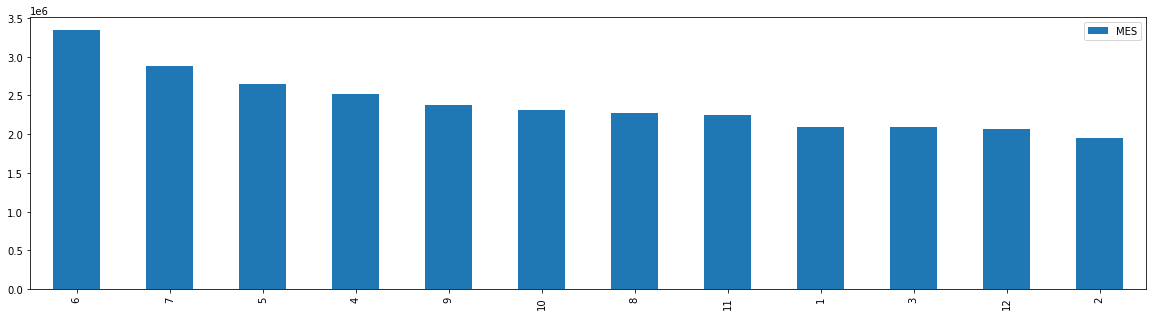

In [25]:
df_TIME['MES'].value_counts().plot(kind='bar', legend=bool, figsize=(20,5));

Observem que el mes que més compres es fan es el juny (6), i el que menys el febrer (2). Tot i això la diferència no és exessiva.

In [26]:
df_TIME['DIA'] = df_TIME['t_dat'].dt.day
df_TIME['DIA'].value_counts()

28    1173045
23    1139438
24    1131296
29    1129530
22    1049063
26    1031018
25    1016422
20     999822
11     973957
3      973492
27     968987
2      951263
6      948494
21     943895
1      937918
4      916817
18     911745
19     910508
17     898535
30     887240
16     881666
8      857088
13     856984
5      856835
10     856551
7      848052
9      840897
12     828334
15     811151
14     794317
31     489059
Name: DIA, dtype: int64

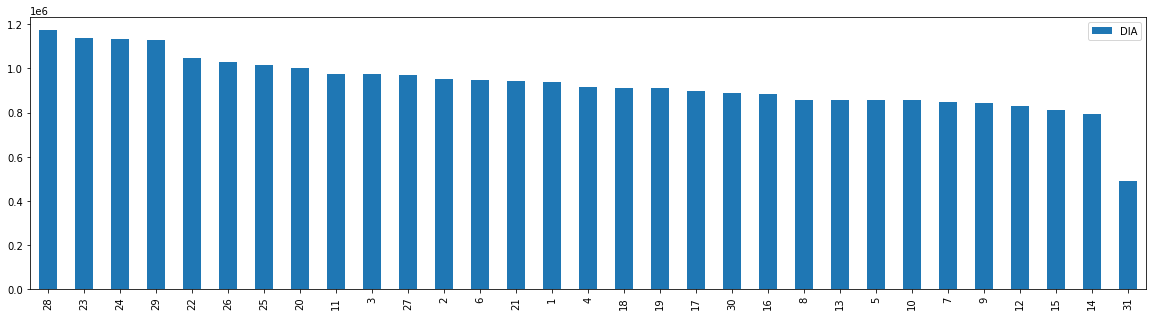

In [27]:
df_TIME['DIA'].value_counts().plot(kind='bar', legend=bool, figsize=(20,5));

Observem que el dia del mes on les compres són superiors es el número 28, i el que menys el 31, cosa que és totalment comprensible ja que no tots els mesos tenen 31 dies.

In [28]:
df_TIME['DIA_SEMANA'] = df_TIME['t_dat'].dt.day_name()
df_TIME['DIA_SEMANA'].value_counts()

Saturday     4623424
Thursday     4411619
Wednesday    4379833
Friday       4340963
Tuesday      3790428
Monday       3647226
Sunday       3619926
Name: DIA_SEMANA, dtype: int64

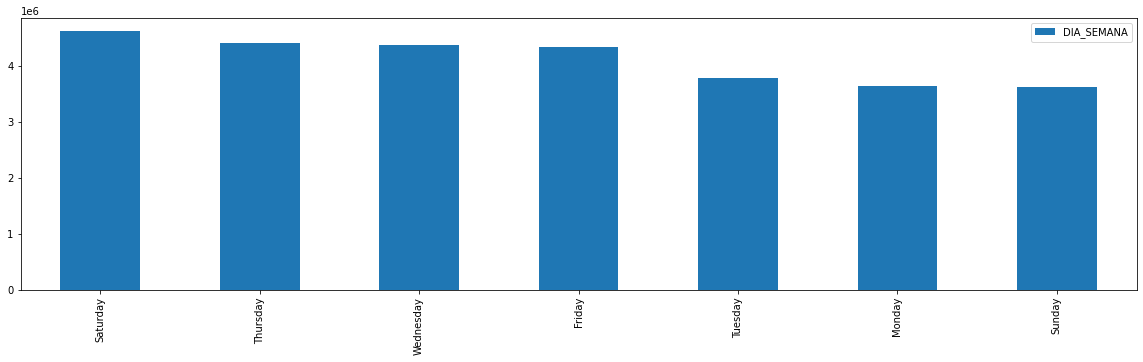

In [29]:
df_TIME['DIA_SEMANA'].value_counts().plot(kind='bar', legend=bool, figsize=(20,5));

Pel que fa al dia de la setmana, quan hi ha més compres és el dissabte, i quan menys el diumenge.


**customer_id**


In [30]:
df_transactions["customer_id"].value_counts()

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1641
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1321
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1304
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1233
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1217
                                                                    ... 
21a7820f6a4915df79683147f8917b62ea81cfe63196f4925591d70e7f4976f7       1
b52720db1d147393d7b7994bcfc761205df55d59c4ac40ad67254b966771b3af       1
b5272c3bf473e77b3fa547ac73743c99f625ae7c9f619adc29b75e59a7f976e0       1
b5273f13b79bfec9cb7d40937dc577c5bf1c47fd4b18b57d2c959d2d3b14450e       1
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241       1
Name: customer_id, Length: 1362281, dtype: int64

In [31]:
df_transactions["customer_id"].nunique()

1362281

Observem que hi ha 1362281 clients diferents i que el client que més compres ha realitzat n'ha fet 1641. Per altra banda, hi ha clients que només han comprat una única vegada.


**article_id**


In [32]:
df_transactions["article_id"].value_counts()

706016001    42672
706016002    30862
372860001    29337
610776002    25234
759871002    23799
             ...  
495979002        1
596329007        1
646388002        1
646388001        1
508638013        1
Name: article_id, Length: 104547, dtype: int64

Observem que l'article amb id 706016001 és el que més vegades s'ha comprat (42672 cops). A més, observem que hi ha varis articles que només s'han comprat una sola vegada. Veiem quants:

In [33]:
df_quantity = df_transactions["article_id"].value_counts()
df_quantity.where(lambda x: x==1).dropna()

572322001    1.0
908465005    1.0
942506001    1.0
443078012    1.0
933263001    1.0
            ... 
495979002    1.0
596329007    1.0
646388002    1.0
646388001    1.0
508638013    1.0
Name: article_id, Length: 4650, dtype: float64

En particular hi ha 4650 articles que s'han comprat una única vegada.

Veiem més informació:

In [34]:
df_transactions["article_id"].value_counts().describe()

count    104547.000000
mean        275.602542
std         696.877456
min           1.000000
25%          13.000000
50%          60.000000
75%         262.000000
max       42672.000000
Name: article_id, dtype: float64

S'han comprat un total de 104547 articles diferents. D'aquests, un 25% s'ha comprat com a màxim 13 vegades, un 50% s'ha comprat com a màxim 60 vegades i un 75%, com a màxim 262.

**price**

Com hem vist anteriorment, el preu varia molt. Això és degut a la gran varietat de productes que hi ha disponibles. Es considera interessant veure quins són els articles que generen més ingressos:

In [35]:
df_article_preu = df_transactions[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)
df_article_preu.rename(columns={"price":"benefici"}, inplace=True)
df_article_preu = df_article_preu.reset_index()
df_article_preu

,article_id,benefici
0,706016001,1382.011831
1,706016002,999.628169
2,568601006,814.209271
3,448509014,651.939864
4,720125001,615.029305
...,...,...
104542,520431003,0.000678
104543,407663007,0.000678
104544,405310006,0.000475
104545,569052001,0.000441


L'article que més benefici genera es correspon amb el que més vegades es ven: 706016001

**sales_channel_id**

In [36]:
df_transactions["sales_channel_id"].value_counts()

2    19686806
1     9126613
Name: sales_channel_id, dtype: int64

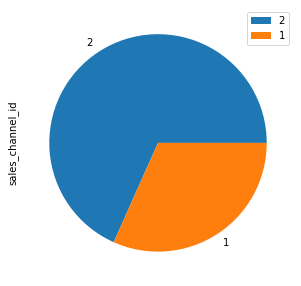

In [37]:
df_transactions['sales_channel_id'].value_counts().plot(kind='pie', legend=bool, figsize=(5,5));

Observem que la majoria de les transaccions es fan de manera online (2), veiem si es comporta sempre així al llarg del temps de manera gràfica:

In [38]:
df_channel_1 = df_transactions[df_transactions["sales_channel_id"] == 1]
df_channel_1

,t_dat,customer_id,article_id,price,sales_channel_id
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1
10,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873020,0.030492,1
11,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873011,0.030492,1
29,2018-09-20,001127bffdda108579e6cb16080440e89bf1250a776c6e...,397068015,0.033881,1
...,...,...,...,...,...
28813387,2020-09-22,ff813df6887c2a6d7065aed247bf1db3d6f629eee23798...,806388002,0.013542,1
28813390,2020-09-22,ff9e122067c18aac7bd96897bb9550405bb11abcc7e2e0...,860833022,0.025407,1
28813396,2020-09-22,ffc2e7c210e3ea602e6d229116773cc0588c929f8cc70b...,858856002,0.042356,1
28813416,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1


In [39]:
df_channel_2 = df_transactions[df_transactions["sales_channel_id"] == 2]
df_channel_2

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
28813412,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2
28813413,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2
28813414,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
28813415,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2


In [40]:
df_sales_channel_1 = pd.DataFrame()
df_sales_channel_1["transactions"] = df_channel_1["t_dat"].value_counts()
df_sales_channel_1.reset_index(level=0, inplace=True)
df_sales_channel_1.rename(columns={"index": "t_dat"}, inplace=True)
df_sales_channel_1 = df_sales_channel_1.sort_values("t_dat", ascending = True, ignore_index = True)
df_sales_channel_1

,t_dat,transactions
0,2018-09-20,12222
1,2018-09-21,13395
2,2018-09-22,7513
3,2018-09-23,6633
4,2018-09-24,8167
...,...,...
684,2020-09-18,13253
685,2020-09-19,15245
686,2020-09-20,6859
687,2020-09-21,7235


In [41]:
df_sales_channel_2 = pd.DataFrame()
df_sales_channel_2["transactions"] = df_channel_2["t_dat"].value_counts()
df_sales_channel_2.reset_index(level=0, inplace=True)
df_sales_channel_2.rename(columns={"index": "t_dat"}, inplace=True)
df_sales_channel_2 = df_sales_channel_2.sort_values("t_dat", ascending = True, ignore_index = True)
df_sales_channel_2

,t_dat,transactions
0,2018-09-20,31497
1,2018-09-21,29615
2,2018-09-22,8763
3,2018-09-23,40000
4,2018-09-24,33206
...,...,...
729,2020-09-18,22537
730,2020-09-19,18611
731,2020-09-20,21285
732,2020-09-21,21693


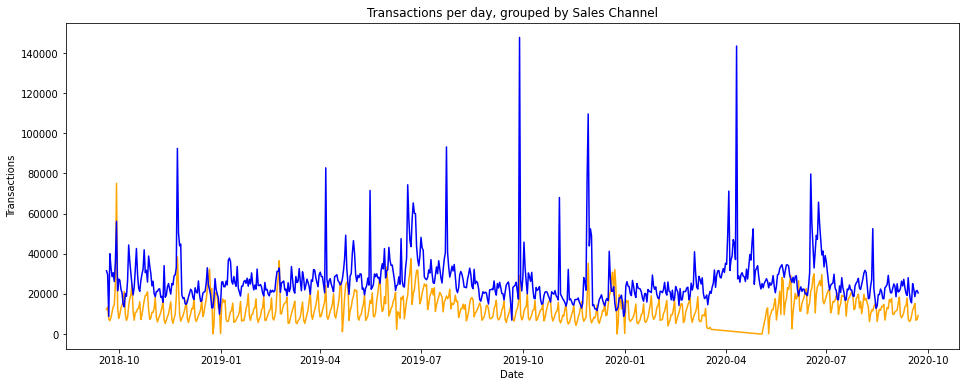

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df_sales_channel_1["t_dat"], df_sales_channel_1["transactions"], color="Orange")
plt.plot(df_sales_channel_2["t_dat"], df_sales_channel_2["transactions"], color="Blue")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day, grouped by Sales Channel")
plt.show()

Observem que al llarg de tot el període, sempre predomina la venta online, excepte alguns pics ocasionals. En particular, destaquem el periode on la venta física es nula, que es correspon amb el periode de covid.

Finalment, exportem el dataset modificat per a utilitzar-lo per el model:

In [43]:
df_transactions.to_csv('transactions_train_model.csv',index=False)